In [ ]:
import numpy as np
import networkx as nx

# Games on Networks

## Basic Definitions

- Each player chooses action $x_i$ in $\{0,1\}$
- payoff will depend on
    - how many neighbors choose each action
    - how many neighbors a player has

- Consider cases where $i$’s payoff is $u_{d_i}(x_i ,m_{N_i})$. It depends only on $d_i(g)$ and $m_{N_i}(g)$ ‐ the number of neighbors of $i$ choosing 1


### Simple Complement Example
- agent $i$ is willing to choose 1 if and only if at least $t$ neighbors do:
    - Payoff action 0: $$u_{d_i}(0, m_{N_i}) = 0$$
    - Payoff action 1: $$u_{d_i}(1, m_{N_i}) = -t + m_{N_i}$$

### Best shot example
- agent $i$ is willing to choose 1 if and only if no
neighbors do:
    - Payoff action 0: $$u_{d_i}(0, m_{N_i}) = \begin{cases}1 \text{ if }m_{N_i}>0\\ 0 \text{ if }m_{N_i}=0\end{cases}$$
    - Payoff action 1: $$u_{d_i}(1, m_{N_i}) = 1 - c$$

### Time for demo

In [ ]:
import net_games
from dash import Dash
app = Dash(__name__, meta_tags=[{"name": "viewport", "content": "width=device-width, initial-scale=1"}])
net_games.create_net_games_app(app)
app.run()

## Complement and Substitutes

- **Externalities**: 
    - Others’ behaviors affect my utility/welfare
    - Others’ behaviors affect my decisions, actions, consumptions, opinions...
    - Others’ actions affect the relative payoffs
to my behaviors
- **Complements:** Choice to take an action by my friends increases my relative payoff to taking that action (e.g., friend
learns to play a video game)
$$u_d(1, m) - u_d (0,m) \geq u_d(1,m') - u_d(0,m')\text{ for all }d, m\geq m'$$
- **Substitutes:** Choice to take an action by my friends decreases my relative payoff to taking that action (e.g., roommate buys
a stereo/fridge)
$$u_d(1, m)-u_d(0, m) \leq u_d (1,m')- u_d(0,m')\text{ for all }d, m\geq m'$$

### Examples

- Complements:
    - education decisions - care about number of neighbors, access to jobs, etc.
    - invest if at least $k$ neighbors do
    - smoking & other behavior among teens, peers, ...
    - technology adoption – how many others are compatible...
    - learn a language, ...
    - cheating, doping
- Substitutes
    - information gathering, e.g., payoff of 1 if anyone in neighborhood is informed, cost to being informed ($c<1$)
    - local public goods (shareable products...)
    - competing firms (oligopoly with local markets)

## Equilibrium

- Nash equilibrium: Every player’s action is optimal for that player given the actions of others
- Often look for pure strategy equilibria
- May require some mixing

### Maximal Independent Set
- **Independent Set:** a set $S$ of nodes such that no two
nodes in $S$ are linked,
- **Maximal:** every node in $N$ is either in $S$ or linked to a
node in $S$

In [ ]:
edge_list_6 = [(0, 1), (1, 2), (2, 0), (3, 2), (4, 2), (5, 4), (5, 3)]
grph = nx.from_edgelist(edge_list_6)
nx.draw(grph, with_labels=True)


In [ ]:
nx.maximal_independent_set(grph)

### Complete lattice
Complete Lattice: for every set of equilibria $X$
- there exists an equilibrium $x'$ such that $x'\geq x$ for all $x$ in $X$, and
- there exists an equilibrium $x''$ such that $x''\leq x$ for all $x$ in $X$.

### Contrast: Complements and Substitutes

- In a game of complements: pure strategy equilibria
are a nonempty complete lattice
- In a game of strategic substitutes:
    - Best shot game: pure strategy equilibria exist and are related to maximal independent sets
    - Others: pure strategy may not exist, but mixed will (with finite action spaces)
    - Equilibria usually do not form a lattice


### Time for demo

In [ ]:
import net_games
from dash import Dash
app = Dash(__name__, meta_tags=[{"name": "viewport", "content": "width=device-width, initial-scale=1"}])
net_games.create_net_games_app(app)
app.run()

## Multiple Equilibria

- Morris (2000) Coordination game
    - Care only about fraction of neighbors
    - prefer to take action 1 if fraction $q$ or more take 1

- Let $S$ be the group that take action 1
- Each $i$ in $S$ must have fraction of at least $q$ neighbors in $S$
- Each $i$ not in $S$ must have a fraction of at least $1 - q$ neighbors outside of $S$

- A group $S$ is $r$‐cohesive relative to $g$ if
$$\min_{i \in S} \frac{|{j \in N_i(g) \cap S}|}{d_i(g)} \geq r$$
- At least a fraction $r$ of each member of $S$'s
neighbors are in $S$
- Cohesiveness of $S$ is $$\min_{i \in S} \frac{|{j \in N_i(g) \cap S}|}{d_i(g)}$$


### Equilibria where both strategies are played:
- **Proposition:** there exists a pure strategy equilibrium where both actions are played if and only if there is
a group $S$ that is at least $q$ cohesive and such that its complement is at least $1‐q$ cohesive.
- If $q=\frac{1}{2}$ players want to match majority
- Then two groups that have more self‐ties than cross‐ties suffices to sustain both actions
- As $q$ rises (game payoffs become more asymmetric), need more homophilous behavior
between the groups to sustain both actions

### Time for Demo

In [ ]:
import net_games_coh
from dash import Dash
app = Dash(__name__, meta_tags=[{"name": "viewport", "content": "width=device-width, initial-scale=1"}])
net_games_coh.create_net_games_coh_app(app)
app.run()

### Application
- Drop out decisions
- Strategic complements
- Value to being in the labor market depends on number of friends in labor force, value to non‐labor activities depend on number of friends outside of labor market
- Participate if at least some fraction of friends do
- Homophily – and different starting conditions (history) lead to different outcomes for different groups...

- Labour market Drop‐Out Rates, Chandra (2000) Census – males 25 to 55

| |1940 |1950| 1960| 1970| 1980| 1990|
|-|-----|----|-----|-----|-----|-----|
|whites| 3.3| 4.2| 3.0| 3.5| 4.8 |4.9|
|blacks| 4.2| 7.5| 6.9| 8.9| 12.7| 12.7|

## Beyond 0‐1 Choices

### Bramoulle and Kranton
- $x_i$ in $[0,1]$
- payoff $$u_i(x_i,x_{‐i})=f\left( x_i+ \sum_{ j \in N_i(g)} x_j\right) - cx_i\text{, where }f\text{ is concave}$$
- Let $x^* > 0$ solve $f'(x^*) = c$
- In all pure strategy Nash equilibria:
$x_i+ \sum_{j \in N_i(g)} x_j \geq x^*$ for all $i$, and if greater, then $x_i=0$
- Look at two types of pure equilibria
    - **distributed:** $x^* > x_i>0$ for some $i$’s
    - **specialized:** for each $i$ either $x_i=0$ or $x_i=x*$

#### Equilibrium examples
Assuming $x^* = 1$

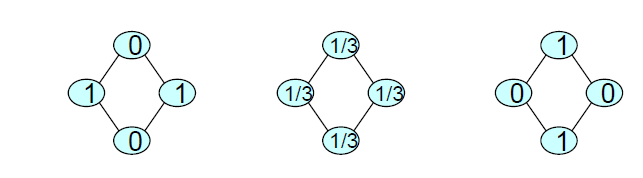

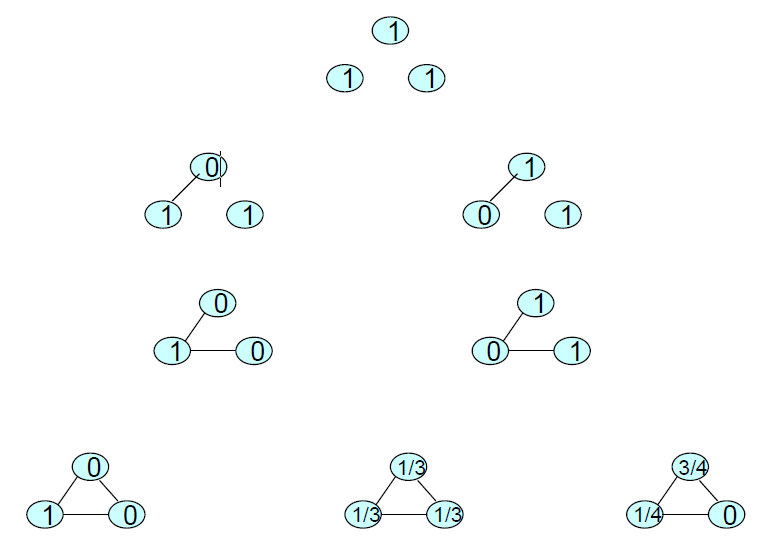

Specialized Equilibria
**Proposition (B&K):** The set of specialized Nash equilibria are profiles such that a maximal
independent set = the specialists ($x_i = x^*$)

#### Stability Notion: pure strategy equilibrium

- perturb $x$ to $x_0 = (x_1+\varepsilon_1, … x_n+\varepsilon_n)$, being sure that
all entries are feasible
- Let $x_1$ be the best response to $x_0$, $x_t$ to $x_{t‐1}$
- If for all small enough $\varepsilon_i$’s converge back to $x$, then "stable"

**Proposition:** Only stable equilibria (B&K) are specialist equilibria such that every non‐specialist has two specialists in his or her neighborhood

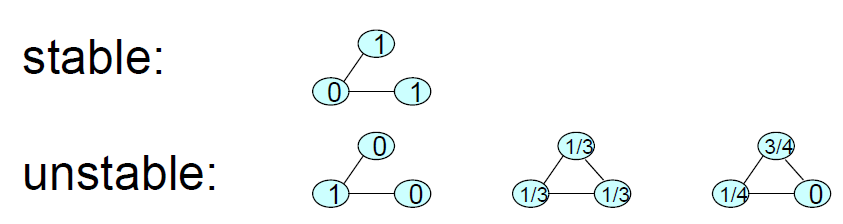

#### Stability and Pairwise Stability:
- Suppose links are costly
- specialists drop links to non
- non‐specialized equilibria are only "stable" ones…

### A Linear Quadratic Model

- strategic complements
- payoff:$$u_i(x_i,x_{‐i}) = a x_i – \frac{b}{2} x_i^2 + \sum_j w_{ij} x_i x_j$$

- Best response of $x_i$ to $x_{‐i}$:
    - $\frac{\partial u_i}{\partial x_i}(x_i,x_{‐i}) = a - b x_i + \sum_j w_{ij} x_j = 0$
    - $x_i = \frac{a + \sum_j w_{ij} x_j}{b}$
    - Vectorized notation:
        $x = \alpha + G x$, where $\alpha = \left(\frac{a}{b}, \ldots, \frac{a}{b}\right)$ and $g_{ij} = \frac{w_{ij}}{b}$
    - if $\alpha \neq 0$ and $I - G$ is invertible matrix, explicit solution given by $x = (I - G)^{-1}\alpha$
    - if $\alpha = 0$ then $x = Gx$, so unit eigenvector 


- Main findings:
    - Actions are related to network structure:
    - higher neighbors’ actions, higher own action
    - higher own action, higher neighbors actions
    - feedback – for solution need $b$ to be large and/or $w_{ij}$’s to be small

- Relation to centrality measures:
    - Bonacich centrality: $$B(G) = (I – G )^{‐1} G 1$$
    - Then
    $$\begin{aligned}
    x &= (I - G)^{-1}\alpha \\ &= (I - G)^{-1}I\alpha \\ &= (I - G)^{-1}(I -G + G)\alpha\\ &=\left(I + (I-G)^{-1}G\right)\alpha\\ &= \left(1 + (I-G)^{-1}G1\right)\frac{a}{b} \\ &= \left(1 + B(G)\right)\frac{a}{b}
    \end{aligned}$$
    - Natural feedback from complementarities, actions relate to the total feedback from various positions
    - Centrality: relative number of weighted influences going from one node to another
    - Captures complementarities

## Repeated Games and Networks

### Favors
- $v$ value of a favor
- $c$ cost of a favor, $v > c > 0$
- $\delta$ discount factor $1 > \delta > 0$
- $p$ probability $i$ needs a favor from $j$ in a period
- Favor need arises at random to (at most) one of the two agents
- Other agent decides whether to provide favor
    - If provided, value $v$ to receiver, $‐c$ to giver
    - Otherwise, value 0 to both

- Favor exchange between two agents
    - expected value of relationship per period
    $$p v ‐ p c$$
    - value of perpetual relationship
    $$(pv - pc)\left(1 + \delta + \delta^2+ \ldots\right) = \frac{p(v-c)}{1-\delta}$$
- Favor exchange between two agents iff:
$$ c < \delta\frac{p(v-c)}{1-\delta}$$

### Social Capital ‐ Ostracism
- Three agents (a ``triad’’): Ostracize agent who does not perform a favor
- Then favor exchange only need
$$c < 2 \delta \frac{p(v-c)}{1-\delta}$$

### Game: Period $t$
- At most one agent $i_t$ is called upon to perform a favor for $j_t \in N_i(g_t )$ ($p$ small)
- it keeps or deletes the link
- Others can respond: announce which (remaining) links they wish to maintain
- Links are retained if mutually agree-resulting network is gt+1

### Robustness Against Social Contagion
- A network such that the punishment for failing to perform a favor only impacts neighbors of original players lose links
- Impact of a deletion/perturbation is local

### Time for Demo

In [ ]:
import net_games_repeat
from dash import Dash
app = Dash(__name__, meta_tags=[{"name": "viewport", "content": "width=device-width, initial-scale=1"}])
net_games_repeat.create_net_games_repeat_app(app)
app.run()

### Supported Links
- link $ij \in g$ is supported if there exists $k$ such that $ik \in g$ and $jk \in g$
- **Theorem:** If no pair of players could sustain favor exchange in isolation and a network is robust, then all of its links are supported.

### Theory vs Measure:
- **Support:** With what frequency do a typical pair of connected nodes, A and B, have a common neighbor?
- **Clustering:** With what frequency are a typical node A’s neighbors, say B and C neighbors of each other?

In [ ]:
edge_list = [(0, 1), (1, 2), (2, 0), (2, 3), (3, 4), (2, 4), (3, 5), (3, 6), (5, 6), (5, 7), (5, 8), (7, 8), (6, 9), (6, 10), (9, 10), (10, 11), (10, 12), (11, 12)]
grph = nx.from_edgelist(edge_list)
nx.draw(grph, with_labels=True)

In [ ]:
def overall_clustering(graph):
    triangles = nx.triangles(graph)
    degree = nx.degree(graph)
    try:
        return sum([triangles[k] for k in triangles]) / sum([v * (v - 1) / 2 for k, v in degree])
    except:
        return 0
    
def edge_support(graph):
    result = {
        edge: 1 if set(graph.neighbors(edge[0])).intersection(set(graph.neighbors(edge[1]))) else 0
        for edge in grph.edges
    }
    return result

def average_support(graph):
    support = edge_support(graph)
    return np.mean(list(support.values()))

In [ ]:
print(f"Average clustering:   {nx.average_clustering(grph)}")
print(f"Overall clustering:   {overall_clustering(grph)}")
print(f"Average link support: {average_support(grph)}")